# Entregable 2 – Exploración y Curación de Datos

*Proyecto: El Robo del Siglo Digital – Mentoría FAMAF 2025*

**Grupo 1**

Autores: Manuel Lopez Werlen - Ayelen Margarita Bertorello - Silvio Fabian Marasca - Ignacio Ariel Lopez Parra

Fecha: 25/07/2025

## Aclaracion pertinente


En base a las diferentes correciones del entregable 1  nos propusimos como grupo, antes de avanzar con el tratamiento especifico del proyecto, ***definir cuestiones clases del proyecto*** como lo son:
- Delimitacion y alcance del proyecto
- Objetivos del proyecto
- Público Objetivo
- Preguntas Guias para el proyecto
- Hipótesis
- Justificación del problema a trabajar

Es por esto que a continuacion dejamos en detalle cada una de ellas, dentro de la celda de texto denominada: **Proyecto Mentoria: Detección de Sitios de Phishing en Argentina**


## ***Proyecto Mentoria: Detección de Sitios de Phishing en Argentina***

***Delimitacion y alcance del proyecto***

Este proyecto se enfoca en la detección automatizada de sitios web fraudulentos que suplantan la identidad de organismos públicos argentinos, como AFIP, ANSES, PAMI, ARBA, BCRA, bancarios, serivios de envios de paqeuteria, entre otros. Estas páginas web falsas son creadas con el propósito de engañar a la ciudadanía y robar información personal, fiscal y bancaria, como credenciales, documentos, archivos PDF adulterados o facturas falsas.

Se analizarán datos de sitios detectados desde el año 2020 hasta la actualidad (2025), justificando esta elección temporal en base al Informe Anual 2024 de UFECI (Unidad Fiscal Especializada en Ciberdelincuencia), el cual destaca en su página 24 que el phishing contra organismos públicos fue la modalidad más denunciada dentro de los delitos informáticos en 2024.

El análisis cubrirá tanto sitios ya reportados como aquellos recolectados mediante web scraping o bases externas, priorizando dominios de bajo nivel de seguridad, URLs maliciosas o campañas masivas reportadas en medios o redes sociales.

***Objetivos***
- Objetivo general
Desarrollar un sistema automatizado de detección de sitios web falsos que suplanten organismos públicos argentinos, utilizando técnicas de aprendizaje automático (machine learning) y análisis de patrones web.

- Objetivos específicos
  - Identificar y recolectar un conjunto representativo de URLs legítimas y fraudulentas asociadas a organismos públicos.
  - Analizar las características comunes de las URLs y contenidos asociados (estructura de dominio, palabras clave, certificados, metadatos, etc.).
  - Evaluar y comparar modelos de clasificación como Random Forest, XGBoost, SVM y redes neuronales.
  - Construir un prototipo funcional de herramienta que, ante la consulta de una URL, indique si esta es potencialmente fraudulenta.
  - Integrar esta solución en una interfaz conversacional (bot) o servicio web accesible para el público general.


***Público Objetivo***

El desarrollo del modelo y el análisis están dirigidos a un público técnico como: equipos de ciencia de datos,especialistas en ciberseguridad, estudiantes avanzados en tecnología e investigadores interesados en fraudes digitales

Sin embargo, el producto final estará diseñado para usuarios no técnicos,es de decir ciudadanía en general.

La herramienta busca ofrecer una interfaz simple, donde cualquier persona pueda consultar una URL y recibir un diagnóstico inmediato sobre su posible peligrosidad.


***Preguntas Guias para el proyecto***
- Pregunta principal:

  ***¿Qué características de URLs y dominios permiten identificar de manera efectiva sitios fraudulentos que suplantan entidades públicas argentinas?***

- Sub-preguntas:
  - ¿Qué patrones estructurales (uso de subdominios, TLDs sospechosos, nombres de organismos en URLs) presentan los sitios de phishing dirigidos a usuarios argentinos?
  - ¿Qué algoritmos de clasificación supervisada ofrecen el mejor rendimiento en este caso de uso?
  - ¿Es posible detectar casos de phishing sin analizar el contenido interno del sitio (solo con la URL o metadatos)
  - ¿Qué métricas de evaluación (precisión, recall, F1-score, AUC) son más relevantes en este problema?
  - ¿Cómo balancear la detección efectiva sin incurrir en falsos positivos que perjudiquen sitios legítimos?

***Hipótesis***
- Las URLs fraudulentas tienden a presentar patrones comunes fácilmente modelables: uso excesivo de guiones, palabras clave institucionales en posiciones no estándar, TLDs baratos (.xyz, .click, etc.).
- Modelos como XGBoost y Random Forest superarán a modelos lineales simples (SVM) en precisión y recall para este tipo de clasificación.
- Es posible desarrollar una herramienta eficaz de detección solo con features de la URL, sin necesidad de scraping del contenido.
- La combinación de análisis técnico y experiencia de usuario puede reducir significativamente la exposición de los ciudadanos al fraude digital.

***Justificación del Problema a trabajar***

El informe de UFECI 2024 (en particular pág. 24) establece que los casos de phishing representaron el 49% de los delitos informáticos investigados, con especial foco en campañas que suplantan a organismos oficiales. Este crecimiento constante del phishing estatal, junto con el bajo nivel de concientización digital en ciertos sectores, genera un terreno fértil para fraudes masivos que afectan tanto a individuos como a pequeñas organizaciones.

El desarrollo de soluciones proactivas, accesibles y basadas en datos reales es una prioridad para reducir el impacto del phishing en la sociedad argentina.



## Índice
1. [Introducción y objetivos](#introduccion)
2. [Carga de datos y contexto](#carga)
3. [Tratamiento de datos](#tratamiento)

   3.1 [Valores faltantes](#faltantes)  
   3.2 [Registros duplicados](#duplicados)  
   3.3 [Inconsistencias y errores](#inconsistencias)  
   3.4 [Variable objetivo: balance de clases](#objetivo)  
4. [Ingeniería de características](#features)  

   4.1 [Curación y refinamiento](#curacion)  
   4.2 [Normalización / Estandarización](#normalizacion)  
   4.3 [Transformaciones](#transformaciones)  
5. [Análisis de correlaciones y visualización](#correlaciones)

   5.1 [Correlaciones generales](#corr-general)  
   5.2 [Relación features ↔ objetivo](#relacion)  
6. [Generación del dataset maestro](#master)

   6.1 [Consolidación del dataset final](#consolidacion)  
   6.2 [Diccionario de datos](#diccionario)  
7. [Conclusiones y próximos pasos](#conclusiones)
8. [Referencias](#referencias)


## 1. Introducción y objetivos  <a id='introduccion'></a>

En este segundo entregable abordamos la etapa clave de exploración y curación de datos. Partiendo de los datasets generados en el entregable anterior, revisaremos a fondo la integridad de los datos, trataremos valores faltantes, depuraremos duplicados e inconsistencias y enriqueceremos las variables mediante técnicas básicas de ingeniería de características. Asimismo, evaluaremos el balance de la variable objetivo (phishing vs. no phishing) y su impacto potencial en el desempeño de futuros modelos. El propósito final es obtener un dataset maestro limpio, coherente y bien documentado que sirva como base sólida para la fase de modelado predictivo.

## 2. Carga de datos y contexto  <a id='carga'></a>


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 2.1 Sitios legítimos
Para este análisis, se partió del listado público de dominios provisto por Tranco List, del cual descargo el top millin provisto y aplicando un filtrado por .ar para solo quedarnos con sitios, recolectamos 3200 dominios. Ademas se realizó una búsqueda en registros de certificados digitales (CT logs), lo que permitió identificar aproximadamente 6.000 dominios potencialmente relevantes para anexar.

Tras un proceso de depuración —en el que se eliminaron dominios inactivos (“sitios muertos”) y aquellos ya presentes en la base inicial de 3.200 sitios analizados previamente— se obtuvo un conjunto complementario de alrededor de 2.000 dominios únicos adicionales.

Dado que no existen datasets públicos extensos de sitios web argentinos, y que NIC Argentina (Dirección Nacional del Registro de Dominios de Internet) no publica un directorio completo, esta estrategia representa una de las pocas vías viables para expandir el corpus de análisis. La propuesta es integrar estos 2.000 nuevos sitios al conjunto existente y asi trabajar con 5.200 sitios.

**Variables (Lista de Features) clave utilizadas en el análisis**

Trabajaremos con 43 variables, detalladas a continuacion

#### Identificación básica del sitio

- **url**: URL completa del sitio web.
- **tld**: Extensión del dominio (por ejemplo, .ar, .com, .net).
- **is_phishing**: Variable objetivo binaria (1 si es sitio phishing, 0 si es legítimo).

#### Estructura de la URL
- **url_length**: Longitud total de la URL.
- **num_dashes**: Cantidad de guiones (-) en la URL.
- **num_digits**: Cantidad de caracteres numéricos en la URL.
- **num_special_chars**: Total de caracteres especiales presentes.
- **path_segments**: Número de segmentos en el path de la URL.
- **num_dots**: Cantidad de puntos en el dominio (indica subdominios).
- **num_underscores**: Número de guiones bajos (_) presentes.
- **num_dashes_in_hostname**: Guiones en el hostname específicamente.
- **double_slash_in_path**: Presencia de “//” en el path (sospechoso).
- **hostname_length**: Longitud del hostname.
- **path_length**: Longitud del path de la URL.
- **query_length**: Longitud de la query de la URL.

#### Temporalidad y WHOIS
- **registration_time**: Tiempo por el cual fue registrado el dominio.
- **creation_date**: Fecha de creación del dominio.
- **expiration_date**: Fecha de vencimiento del dominio.
- **site_age_years**: Antigüedad del dominio en años.
- **time_to_expire_years**: Tiempo restante hasta que expire el dominio.

#### Información del registro
- **registrar**: Nombre del registrador del dominio.
- **country_registered**: País donde fue registrado.
- **is_registered_in_ar**: True si fue registrado en Argentina.

#### Seguridad y comportamiento web
- **has_https**: True si el sitio utiliza HTTPS.
- **has_ssl_cert**: True si tiene certificado SSL válido.
- **insecure_forms**: True si contiene formularios inseguros.
- **submit_info_to_email**: True si el formulario envía datos por email.
- **abnormal_form_action**: Acción del formulario inusual o sospechosa.
- **iframe_present**: True si el sitio contiene iframes.

#### Indicadores de phishing
- **random_string**: True si el dominio contiene una cadena aleatoria.
- **sensitive_words_count**: Cantidad de palabras sensibles como ‘login’, ‘bank’, etc.
- **embedded_brand_name**: True si hay una marca incrustada en la URL.
- **https_in_hostname**: True si el hostname incluye “https” como palabra.
- **domain_in_subdomains**: True si el dominio está oculto en subdominios.
- **domain_in_paths**: True si el dominio aparece dentro del path.

#### Respuesta del servidor
- **response_time**: Tiempo de respuesta del sitio.
- **responds**: True si el sitio responde correctamente.
- **http_status_code**: Código HTTP devuelto por el servidor.
- **redirected_url**: URL final en caso de redirección.

#### Contenido de la página
- **title**: Título HTML de la página.
- **title_length**: Longitud del título.
- **meta_keywords**: Palabras clave en los metadatos.
- **category**: Clasificación temática del sitio.




In [ ]:
#Dataset sitios legitimos
dataLegitimo = pd.read_csv('https://github.com/manulopezw/Mentoria-DiploDatos/raw/refs/heads/main/sitios_argentinos_enriquecidos.csv')


### 2.2 Sitios fraudulentos

##Recolección de sitios phishing

Para construir el conjunto de sitios phishing incluidos en el dataset, se consultaron cuatro fuentes públicas reconocidas por mantener listados actualizados de URLs maliciosas. El objetivo fue identificar dominios específicamente registrados con el TLD '.ar', con foco en detectar actividad fraudulenta vinculada a Argentina.

La siguiente tabla resume las fuentes utilizadas, el total de sitios que contenía cada una al momento de la descarga, la cantidad de sitios '.ar' efectivamente extraídos, y un enlace de referencia a cada fuente:

| Fuente                  | Total de sitios | Sitios '.ar' extraídos | Enlace de referencia |
|-------------------------|----------------:|------------------------:|----------------------|
| PhishTank               | 51,816          | 30                      | [phishtank.org](https://phishtank.org/) |
| PhishStats              | 6,081,917       | 100                     | [phishstats.info](https://phishstats.info/) |
| Phishing.Database       | 452,287         | 497                     | [github.com/Phishing-Database](https://github.com/Phishing-Database) |
| Phishing Site URLs      | 144,839         | 671                     | [Kaggle Dataset](https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls/) |

> Nota:
- En el caso de PhishStats, se obtuvieron 100 sitios '.ar' debido a la limitación de la API gratuita. Es probable que exista una mayor cantidad de dominios '.ar' dentro de esa fuente.
- En el entregable 1, se utilizo el sitio Openphish para recolectar los sitios fraudulentos, pero este en su version libre solo permite descargar una lista de 300 sitios, de los cuales al revisar, ninguo de ellos cumple con la condicion de ser .ar por lo que no nos son de utilidad.


Todos los sitios '.ar' fueron identificados a partir del TLD del dominio ('.ar'), sin importar el subdominio o el nivel jerárquico en la URL. Adicionalmente, se aplicaron procesos de validación para eliminar duplicados y asegurar que los dominios extraídos tuvieran un formato válido.

Finalmente asi, se recolectaron 1159 datos de sitios phishing. Esta cantidad resulta suficiente ya que representa mas del 5% (288 sitios) del total de datos de sitios legitimos, que suele ser el recomendado para trabajar con un modelo de clasificiacion binario.



In [ ]:
#Dataset Sitios Phishing
dataPhishing = pd.read_csv('https://github.com/manulopezw/Mentoria-DiploDatos/raw/refs/heads/main/sitios_argentinos_enriquecidos_fraudulentos.csv')

### 2.3 Sitios fraudulentos sinteticos

Dado que el dataset de sitios fraudes, si bien tiene mas de 1000 datos, para el desarrollo del modelo y evitar posibles problemas,como científicos de datos, simulamos el comportamiento esperado de sitios fraudulentos y legítimos para:


*   Practicar sin comprometer datos reales.

*   Entrenar modelos en contextos controlados.

*   Entender mejor cómo ciertas características impactan en la clasificación.

Con el fin de simular el comportamiento real bajo reglas que reflejan cómo actúan los actores maliciosos en la web. Así, pudimos construir un dataset que entrenen modelos más robustos.

Para contruir estos sitios realizamos con la ayuda de IA,lo sigueinte:

Separamos las variables en dos grupos: numéricas y categóricas/textuales. Para las numéricas, aplicamos Gaussian Noise (ruido gaussiano leve) sobre los registros reales etiquetados como phishing, preservando la distribución original. Para las variables categóricas y de texto (como url, title, registrar), utilizamos generadores por reglas que simulan patrones comunes de phishing en español orientados a usuarios argentinos. Finalmente, concatenamos los datos sintéticos debajo de los reales, sin mezclar ni alterar columnas originales.

Obteniendo asi 1000 registros, que se agregaron a los reales ya obtenidos.


In [ ]:
#Dataset sitios fraudulentos + sinteticos
dataPhishingAumentado = pd.read_csv('https://github.com/manulopezw/Mentoria-DiploDatos/raw/refs/heads/main/sitios_argentinos_enriquecidos_fraudulentos_mas_sinteticos.csv')

### Resumen de datos

| Tipo de sitio                 | Fuente                             | Cantidad de sitios | is_phishing |
|------------------------------|------------------------------------|--------------------|-------------|
| Sitios legítimos             | Tranco List + Scraping             | 5.758              | False       |
| Sitios fraudulentos reales   | PhishTank, PhishStats, etc.        | 1.158              | True        |
| Sitios fraudulentos sintéticos | Generados con IA      | 1.000              | True        |
| **Total**                    | —                                  | **7.916**          | —           |

### Creacion de 2 Datasets maestros

A continuacion uniremos para crear dos conjuntos de datos, en el primer lugar el que contenga : dataLegitimo + dataPhishingAumentado (para un trabajo con los datos sintenticos generados) denominado dataMaestro2. Y en segundo lugar dataLegitimo + dataPhishing (para un trabajo sin los datos sintenticos generados)denominado dataMaestro1.

En sintesis:

| Nombre del Dataset | Sitios legítimos | Sitios fraudulentos reales | Sitios fraudulentos sintéticos | Total de sitios | % de sitios fraudulentos |
|--------------------|------------------|-----------------------------|-------------------------------|------------------|---------------------------|
| Dataset 1          | 5.758            | 1.158                       | 0                             | 6.916            | 16,74%                    |
| Dataset 2          | 5.758            | 1.158                       | 1.000                         | 7.916            | 27,28%                    |


In [ ]:
#Dataset maestro sin datos sinteticos
dataMaestro1 = pd.concat([dataLegitimo, dataPhishing], ignore_index=True)

#Dataset maestro con datos sinteticos
dataMaestro2 = pd.concat([dataLegitimo, dataPhishingAumentado], ignore_index=True)

## 3. Tratamiento de datos  <a id='tratamiento'></a>

### 3.1 Valores faltantes  <a id='faltantes'></a>


Antes de comenzar a trabajar con los datos directamente, haremos una visulizacion en forma de recordatorio de algunos elementos importantes de los datasets a trabajar.

Aclaramos ademas que todo el trabajo se vera duplicado en base a la idea de trabajar con los dos dataset maestros, diferenciado la incluison  de datos sinteticos o no.


In [ ]:
display(dataMaestro1.columns, dataMaestro2.columns)

Index(['url', 'tld', 'is_phishing', 'url_length', 'num_dashes', 'num_digits',
       'num_special_chars', 'path_segments', 'num_dots', 'num_underscores',
       'num_dashes_in_hostname', 'double_slash_in_path', 'hostname_length',
       'path_length', 'query_length', 'registration_time', 'creation_date',
       'expiration_date', 'site_age_years', 'time_to_expire_years',
       'registrar', 'country_registered', 'is_registered_in_ar', 'has_https',
       'has_ssl_cert', 'iframe_present', 'insecure_forms',
       'submit_info_to_email', 'abnormal_form_action', 'response_time',
       'responds', 'http_status_code', 'redirected_url', 'title',
       'title_length', 'meta_keywords', 'category', 'random_string',
       'sensitive_words_count', 'embedded_brand_name', 'https_in_hostname',
       'domain_in_subdomains', 'domain_in_paths'],
      dtype='object')

Index(['url', 'tld', 'is_phishing', 'url_length', 'num_dashes', 'num_digits',
       'num_special_chars', 'path_segments', 'num_dots', 'num_underscores',
       'num_dashes_in_hostname', 'double_slash_in_path', 'hostname_length',
       'path_length', 'query_length', 'registration_time', 'creation_date',
       'expiration_date', 'site_age_years', 'time_to_expire_years',
       'registrar', 'country_registered', 'is_registered_in_ar', 'has_https',
       'has_ssl_cert', 'iframe_present', 'insecure_forms',
       'submit_info_to_email', 'abnormal_form_action', 'response_time',
       'responds', 'http_status_code', 'redirected_url', 'title',
       'title_length', 'meta_keywords', 'category', 'random_string',
       'sensitive_words_count', 'embedded_brand_name', 'https_in_hostname',
       'domain_in_subdomains', 'domain_in_paths'],
      dtype='object')

In [ ]:
nulos = dataMaestro1.isnull().sum()
porcentaje_nulos = ((nulos / len(dataMaestro1)) * 100).round(1)

nulos_df = pd.DataFrame({
    'Cantidad de datos nulos': nulos,
    'Porcentaje de datos nulos': porcentaje_nulos
}).sort_values(by='Porcentaje de datos nulos', ascending=False)

nulos_df[nulos_df['Cantidad de datos nulos'] > 0] # esto hace que no sean mostradas las columnas que no tiene datos nulos

,Cantidad de datos nulos,Porcentaje de datos nulos
meta_keywords,5845,85.7
site_age_years,3030,44.4
creation_date,3030,44.4
expiration_date,3030,44.4
registration_time,3030,44.4
time_to_expire_years,3030,44.4
registrar,3030,44.4
title,1652,24.2
redirected_url,1296,19.0
http_status_code,1296,19.0


Notemos que de esta tabla podemos concluir que 12 de las 43 columnas contienen datos nulos, ademas meta_keywords es la que respresenta la mayor cantidad de datos faltantes, pero la misma es categorica y no es posible imputarla, por lo que decidimos (en la seccion 3.5) eliminarla, por su alto porcentaje de nulos (85.7%) y bajo valor informativo.

In [ ]:
nulos = dataMaestro2.isnull().sum()
porcentaje_nulos = ((nulos / len(dataMaestro2)) * 100).round(1)

nulos_df = pd.DataFrame({
    'Cantidad de datos nulos': nulos,
    'Porcentaje de datos nulos': porcentaje_nulos
}).sort_values(by='Porcentaje de datos nulos', ascending=False)

nulos_df[nulos_df['Cantidad de datos nulos'] > 0] # esto hace que no sean mostradas las columnas que no tiene datos nulos

,Cantidad de datos nulos,Porcentaje de datos nulos
meta_keywords,5845,74.8
site_age_years,3030,38.8
creation_date,3030,38.8
expiration_date,3030,38.8
registration_time,3030,38.8
time_to_expire_years,3030,38.8
registrar,3030,38.8
redirected_url,1794,22.9
title,1652,21.1
response_time,1296,16.6


Aqui notemos, que todos los porcentajes nulos bajaron ya que en los datos sinteticos estos estan rellenos.

Esta proxima linea, nos permite visualizar de datos faltantes por variables.

<Axes: >

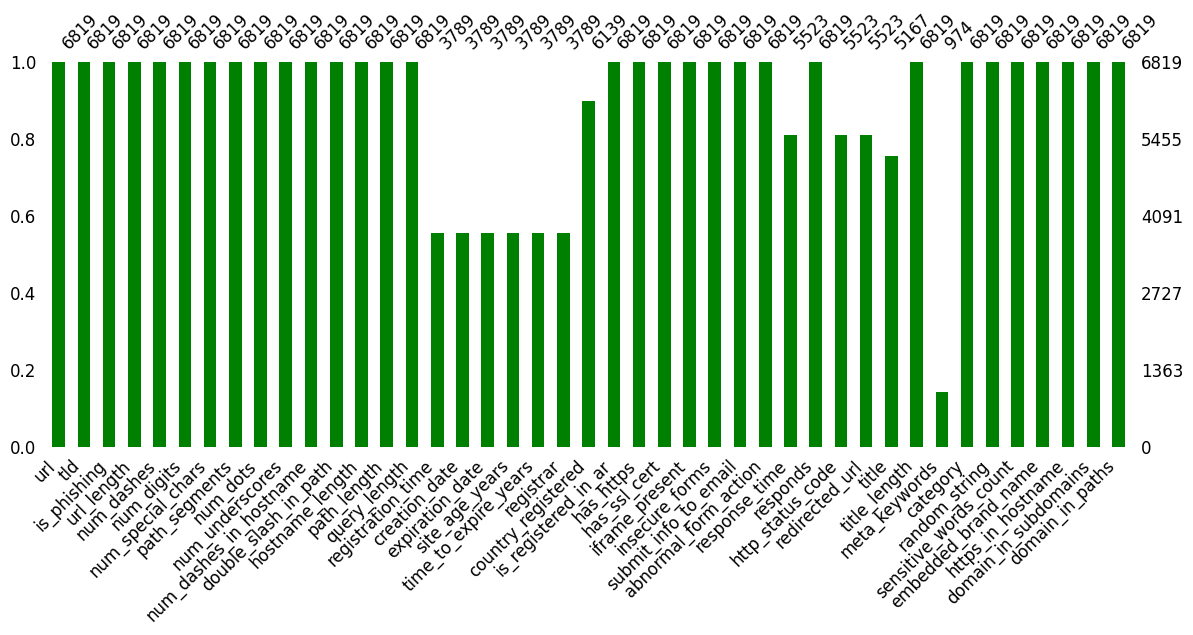

In [ ]:
import missingno as msno
msno.bar(dataMaestro1, figsize=(14,5), fontsize=12, color='green')

<Axes: >

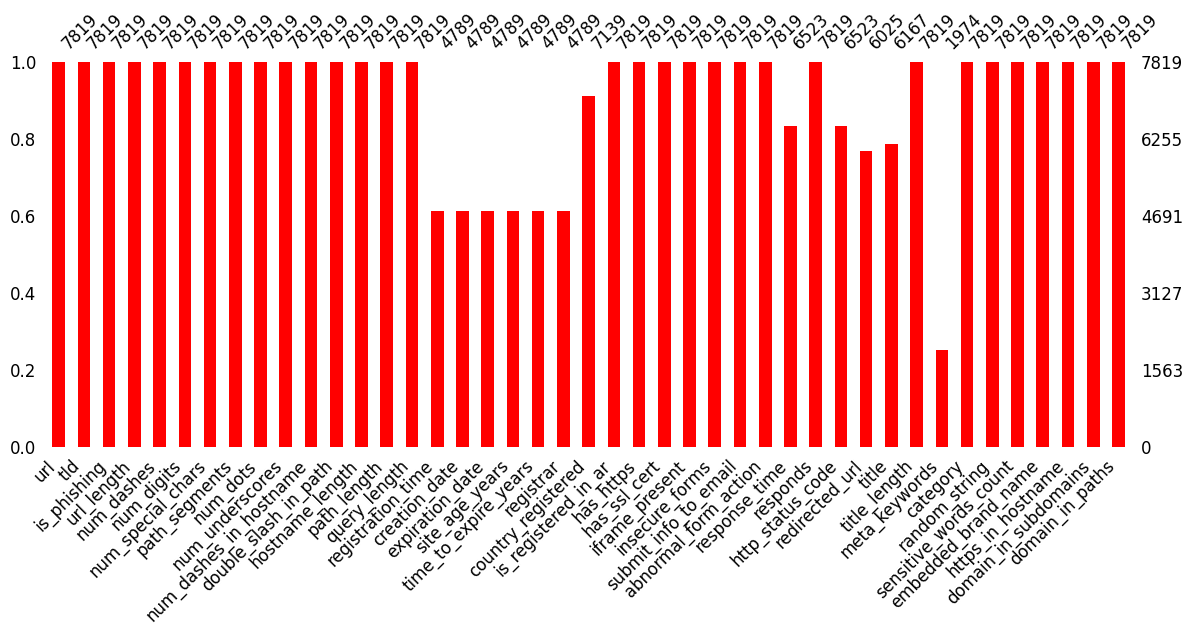

In [ ]:
msno.bar(dataMaestro2, figsize=(14,5), fontsize=12, color='red')

### 3.2 Registros duplicados  <a id='duplicados'></a>

A continuacion revisaremos y trabajaremos con la posible existencia de datos duplicados. Aclaramos que solamentente lo veremos para la columna url (tambien es posible analizarlo para redirected_url)

In [ ]:
# 2. Enumerar dominios duplicados
duplicados_dominios_1 = dataMaestro1[dataMaestro1.duplicated(subset=['url'], keep=False)]

print(f"Dominios duplicados: {len(duplicados_dominios_1)}")

# 3. Eliminar duplicados conservando la primera ocurrencia
dataMaestro1_sin_duplicados_dominio = dataMaestro1.drop_duplicates(subset=['url'], keep='first')

print(f"Cantidad de dominios despues de la limpieza: {len(dataMaestro1_sin_duplicados_dominio)}")


Dominios duplicados: 10
Cantidad de dominios despues de la limpieza: 6814


In [ ]:
# 2. Enumerar dominios duplicados
duplicados_dominios_2 = dataMaestro2[dataMaestro2.duplicated(subset=['url'], keep=False)]

print(f"Dominios duplicados: {len(duplicados_dominios_2)}")

# 3. Eliminar duplicados conservando la primera ocurrencia
dataMaestro2_sin_duplicados_dominio = dataMaestro2.drop_duplicates(subset=['url'], keep='first')

print(f"Cantidad de dominios despues de la limpieza: {len(dataMaestro2_sin_duplicados_dominio)}")

Dominios duplicados: 12
Cantidad de dominios despues de la limpieza: 7813


### 3.3 Inconsistencias y errores  <a id='inconsistencias'></a>

In [ ]:
#Revisamos los diferentes tipos de cada variable
dataMaestro1.dtypes

,0
url,object
tld,object
is_phishing,bool
url_length,int64
num_dashes,int64
num_digits,int64
num_special_chars,int64
path_segments,int64
num_dots,int64
num_underscores,int64


In [ ]:
dataMaestro2.dtypes

,0
url,object
tld,object
is_phishing,int64
url_length,int64
num_dashes,int64
num_digits,int64
num_special_chars,int64
path_segments,int64
num_dots,int64
num_underscores,int64


Realizamos algunas conversiones de tipos de datos para optimizar el tratamiento de las siguientes variables:

creation_date, expiration_date y registration_time fueron convertidas a tipo datetime para permitir operaciones de fecha como cálculos de antigüedad, ordenamiento temporal o detección de inconsistencias. Y por ultimo http_status_code se transformó a tipo Int64 (entero con soporte para valores nulos), ya que representa códigos de respuesta HTTP que son valores enteros.

Aclaramos ademas que entendemos que el resto de las variables tiene datatype bien asignados.

In [ ]:
# Convertir a datetime
dataMaestro1['creation_date'] = pd.to_datetime(dataMaestro1['creation_date'], errors='coerce')
dataMaestro1['expiration_date'] = pd.to_datetime(dataMaestro1['expiration_date'], errors='coerce')
dataMaestro1['registration_time'] = pd.to_datetime(dataMaestro1['registration_time'], errors='coerce')

# Convertir a entero nullable
dataMaestro1['http_status_code'] = dataMaestro1['http_status_code'].astype('Int64')

In [ ]:
# Convertir a datetime
dataMaestro2['creation_date'] = pd.to_datetime(dataMaestro2['creation_date'], errors='coerce')
dataMaestro2['expiration_date'] = pd.to_datetime(dataMaestro2['expiration_date'], errors='coerce')
dataMaestro2['registration_time'] = pd.to_datetime(dataMaestro2['registration_time'], errors='coerce')

# Convertir a entero nullable
dataMaestro2['http_status_code'] = dataMaestro2['http_status_code'].astype('Int64')

### 3.4 Variable objetivo: balance de clases  <a id='objetivo'></a>

Aqui analizamos de forma graficas la proporción de clases fraude / no fraude.

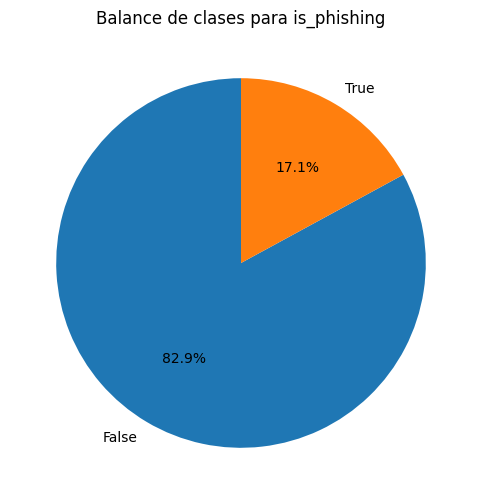

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
dataMaestro1['is_phishing'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Balance de clases para is_phishing')
plt.ylabel('')
plt.show()

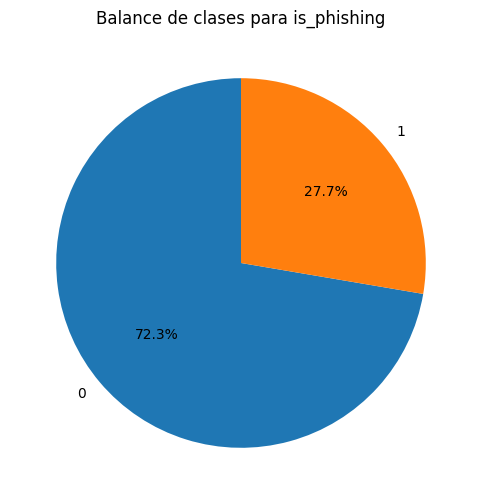

In [ ]:
plt.figure(figsize=(6, 6))
dataMaestro2['is_phishing'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Balance de clases para is_phishing')
plt.ylabel('')
plt.show()

### 3.5 Imputaciones

Tratamiento de variables con datos faltantes

- **meta_keywords**: se eliminará la variable debido a su alto porcentaje de valores nulos (85.7%) y bajo valor informativo.
- **creation_date** y **expiration_date**: se imputarán los valores faltantes utilizando la mediana de cada columna.
- **site_age_years** y **time_to_expire_years**: se recalcularán a partir de las fechas ya imputadas (`creation_date` y `expiration_date`), expresando los resultados en años con dos decimales.
- **registration_time**: se imputarán los valores faltantes con la mediana de la columna.
- **registrar**: se imputarán los valores faltantes con la categoría `"Desconocido"`.
- **title**: se completarán los valores nulos con el texto `"Sin título"`.
- **redirected_url**: se imputarán los valores faltantes con una cadena vacía (`""`).
- **http_status_code**: se imputarán los valores faltantes con el valor `0`, indicando ausencia de respuesta.
- **response_time**: se imputarán los valores faltantes con la mediana de la columna.
- **country_registered**: se imputarán los valores faltantes con la categoría `"Desconocido"`.






In [ ]:
# 1. Eliminar 'meta_keywords'
#dataMaestro1 = dataMaestro1.drop(columns=['meta_keywords'])

# 2. Imputar fechas con la mediana
mediana_creation = dataMaestro1['creation_date'].dropna().median()
mediana_expiration = dataMaestro1['expiration_date'].dropna().median()

dataMaestro1['creation_date'] = dataMaestro1['creation_date'].fillna(mediana_creation)
dataMaestro1['expiration_date'] = dataMaestro1['expiration_date'].fillna(mediana_expiration)

# 3. Recalcular variables derivadas a partir de fechas
hoy = pd.to_datetime("today")

dataMaestro1['site_age_years'] = ((hoy - dataMaestro1['creation_date']).dt.days / 365).round(2)
dataMaestro1['time_to_expire_years'] = ((dataMaestro1['expiration_date'] - hoy).dt.days / 365).round(2)

# 4. Imputar 'registration_time' con la mediana
dataMaestro1['registration_time'] = dataMaestro1['registration_time'].fillna(dataMaestro1['registration_time'].median())

# 5. Imputar categóricas con "Desconocido"
dataMaestro1['registrar'] = dataMaestro1['registrar'].fillna('Desconocido')
dataMaestro1['country_registered'] = dataMaestro1['country_registered'].fillna('Desconocido')

# 6. Imputar texto con valores estándar
dataMaestro1['title'] = dataMaestro1['title'].fillna('Sin título')
dataMaestro1['redirected_url'] = dataMaestro1['redirected_url'].fillna('')

# 7. Imputar numéricos
dataMaestro1['http_status_code'] = dataMaestro1['http_status_code'].fillna(0)
dataMaestro1['response_time'] = dataMaestro1['response_time'].fillna(dataMaestro1['response_time'].median())

# Verificación final
print(dataMaestro1.isnull().sum())

url                          0
tld                          0
is_phishing                  0
url_length                   0
num_dashes                   0
num_digits                   0
num_special_chars            0
path_segments                0
num_dots                     0
num_underscores              0
num_dashes_in_hostname       0
double_slash_in_path         0
hostname_length              0
path_length                  0
query_length                 0
registration_time            0
creation_date                0
expiration_date              0
site_age_years               0
time_to_expire_years         0
registrar                    0
country_registered           0
is_registered_in_ar          0
has_https                    0
has_ssl_cert                 0
iframe_present               0
insecure_forms               0
submit_info_to_email         0
abnormal_form_action         0
response_time                0
responds                     0
http_status_code             0
redirect

In [ ]:
# 1. Eliminar 'meta_keywords'
dataMaestro2 = dataMaestro2.drop(columns=['meta_keywords'])

# 2. Imputar fechas con la mediana
mediana_creation = dataMaestro2['creation_date'].dropna().median()
mediana_expiration = dataMaestro2['expiration_date'].dropna().median()

dataMaestro2['creation_date'] = dataMaestro2['creation_date'].fillna(mediana_creation)
dataMaestro2['expiration_date'] = dataMaestro2['expiration_date'].fillna(mediana_expiration)

# 3. Recalcular variables derivadas a partir de fechas
hoy = pd.to_datetime("today")

dataMaestro2['site_age_years'] = ((hoy - dataMaestro2['creation_date']).dt.days / 365).round(2)
dataMaestro2['time_to_expire_years'] = ((dataMaestro2['expiration_date'] - hoy).dt.days / 365).round(2)

# 4. Imputar 'registration_time' con la mediana
dataMaestro2['registration_time'] = dataMaestro2['registration_time'].fillna(dataMaestro2['registration_time'].median())

# 5. Imputar categóricas con "Desconocido"
dataMaestro2['registrar'] = dataMaestro2['registrar'].fillna('Desconocido')
dataMaestro2['country_registered'] = dataMaestro2['country_registered'].fillna('Desconocido')

# 6. Imputar texto con valores estándar
dataMaestro2['title'] = dataMaestro2['title'].fillna('Sin título')
dataMaestro2['redirected_url'] = dataMaestro2['redirected_url'].fillna('')

# 7. Imputar numéricos
dataMaestro2['http_status_code'] = dataMaestro2['http_status_code'].fillna(0)
dataMaestro2['response_time'] = dataMaestro2['response_time'].fillna(dataMaestro2['response_time'].median())

# Verificación final
print(dataMaestro2.isnull().sum())

url                       0
tld                       0
is_phishing               0
url_length                0
num_dashes                0
num_digits                0
num_special_chars         0
path_segments             0
num_dots                  0
num_underscores           0
num_dashes_in_hostname    0
double_slash_in_path      0
hostname_length           0
path_length               0
query_length              0
registration_time         0
creation_date             0
expiration_date           0
site_age_years            0
time_to_expire_years      0
registrar                 0
country_registered        0
is_registered_in_ar       0
has_https                 0
has_ssl_cert              0
iframe_present            0
insecure_forms            0
submit_info_to_email      0
abnormal_form_action      0
response_time             0
responds                  0
http_status_code          0
redirected_url            0
title                     0
title_length              0
category            

Pudimos verificar asi, que las columnas que contenian nulos, ya no tienen estos elementos, generando asi finalmente los nuevos conjuntos de datos, denominados: dataMaestroSinNulos1 y dataMaestroSinNulos2

In [ ]:
dataMaestroSinNulos1= dataMaestro1
dataMaestroSinNulos2= dataMaestro2

## 4. Ingeniería de características  <a id='features'></a>

En esta secciones buscamos resolver el objetivo de aplicar técnicas de normalización y estandarizacion de variables para optimizar el dataset para el modelado. En la Normalización/Estandarización, ajustmaos de las escalas de las variables numéricas para evitar que aquellas con rangos más amplios dominen el
proceso de modelado.
Utilizaremos para ello la funcion SatnadardScaler de la libreria sklearn.preprocessiong.  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas a escalar
numeric_features = [
    'url_length', 'num_dashes', 'num_digits', 'num_special_chars',
    'path_segments', 'num_dots', 'num_underscores', 'num_dashes_in_hostname',
    'hostname_length', 'path_length', 'query_length',
    'site_age_years', 'time_to_expire_years', 'response_time',
    'http_status_code', 'title_length', 'sensitive_words_count'
]

# Crear una copia para escalar
dataMaestro1_scaled = dataMaestro1.copy()

# Aplicar StandardScaler
scaler = StandardScaler()
dataMaestro1_scaled[numeric_features] = scaler.fit_transform(dataMaestro1_scaled[numeric_features])

In [ ]:
# Crear una copia para escalar
dataMaestro2_scaled = dataMaestro2.copy()

# Aplicar StandardScaler
scaler = StandardScaler()
dataMaestro2_scaled[numeric_features] = scaler.fit_transform(dataMaestro2_scaled[numeric_features])

## 5. Análisis de correlaciones y visualización  <a id='correlaciones'></a>

Analisaremos de forma visutal, las diferentes relaciones que se establen entre las variables con un "mapa de calor".

### 5.1 Correlaciones generales  <a id='corr-general'></a>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
data_numeric = dataMaestro1_scaled.select_dtypes(include=['number'])
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de correlaciones de variables numéricas')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
data_numeric = dataMaestro2_scaled.select_dtypes(include=['number'])
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de correlaciones de variables numéricas')
plt.show()

Notemos que aqui la relacion es entre las diferentes variables, pero sin tener en cuenta la condicion 'is_phishing'

In [ ]:
import numpy as np
# Obtener pares de variables con alta correlación (por encima de 0.8 o debajo de -0.7)
high_corr = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlación'].abs() > 0.7]
display(high_corr_pairs)

De este grafico general podemos concluir que, todas las caracteristicas que se desglozan de la url, tienden a estar relacionadas.

### 5.2 Relación features ↔ objetivo  <a id='relacion'></a>

Incluimos aqui algunos boxplots, gráficos de barras y tablas cruzadas que muestren la relación entre las variables predictoras seleccionadas y la variable objetivo.

In [ ]:
data_corr = data_numeric.copy()
data_corr['is_phishing'] = dataMaestro1_scaled['is_phishing'].astype(int)
cor_with_target = data_corr.corr()['is_phishing'].drop('is_phishing').sort_values(key=abs, ascending=True)
print(cor_with_target)

In [ ]:
cor_with_target.plot(kind='barh', figsize=(8,6))
plt.title('Correlación de variables numéricas con es_phishing')
plt.xlabel('Coeficiente de correlación')
plt.show()

In [ ]:
data_corr = data_numeric.copy()
data_corr['is_phishing'] = dataMaestro2_scaled['is_phishing'].astype(int)
cor_with_target = data_corr.corr()['is_phishing'].drop('is_phishing').sort_values(key=abs, ascending=True)
print(cor_with_target)

In [ ]:
cor_with_target.plot(kind='barh', figsize=(8,6))
plt.title('Correlación de variables numéricas con es_phishing')
plt.xlabel('Coeficiente de correlación')
plt.show()

Asi podemos concluir para ambos conjuntos de datos, dado que no hay variaciones significativas lo siguiente:

Las variables más correlacionadas con sitios phishing son aquellas relacionadas con la estructura de la URL, como path_segments, url_length, path_length y num_dots, lo que indica que los sitios fraudulentos tienden a tener URLs más largas y complejas.
También se observan correlaciones moderadas en características como num_dashes, num_digits y query_length, comunes en URLs automatizadas o engañosas. Por otro lado, variables como title_length y http_status_code presentan correlación negativa, sugiriendo que los sitios phishing suelen tener títulos más cortos y códigos de estado menos usuales. En cambio, variables como sensitive_words_count y site_age_years muestran poca relación con la variable objetivo.

Cerramos esta idea con que las variables relacionadas con estructura de la URL son las más prometedoras para detectar phishing.

## 6. Generación del dataset maestro  <a id='master'></a>


### 6.1 Consolidación del dataset final  <a id='consolidacion'></a>

A continuacion decidimos quedanor finalmente con la siguiente lista de variables para el modelo:

In [ ]:
# Lista de variables seleccionadas para el modelado
columnas_master = [
    # Variables con alta correlación
    'url_length',
    'num_dashes',
    'num_digits',
    'num_special_chars',
    'path_segments',
    'num_dots',
    'hostname_length',
    'path_length',
    'query_length',
    'num_underscores',
    'num_dashes_in_hostname',
    'title_length',
    'http_status_code',

    # Variables booleanas/categóricas relevantes
    'has_https',
    'has_ssl_cert',
    'iframe_present',
    'insecure_forms',
    'submit_info_to_email',
    'abnormal_form_action',
    'double_slash_in_path',
    'is_registered_in_ar',
    'responds',

    # Variable objetivo
    'is_phishing'
]

# Creamos el dataset maestro solo con las columnas pertinentes
master_df1 = dataMaestro1_scaled[columnas_master].copy()

# Guardar como CSV
master_df1.to_csv('master_dataset1.csv', index=False)

print("Master dataset generado y guardado como 'master_dataset1.csv'")


In [ ]:
# Creamos el dataset maestro solo con las columnas pertinentes
master_df2 = dataMaestro1_scaled[columnas_master].copy()

# Guardar como CSV
master_df2.to_csv('master_dataset2.csv', index=False)

print("Master dataset generado y guardado como 'master_dataset2.csv'")

### 6.2 Diccionario de datos  <a id='diccionario'></a>

Compartimos una tabla con la descripción de cada columna del dataset final (en el comienzo del archivo de igual forma fueron detalladas para su trabajo)

| **Categoría**                    | **Variable**                  | **Descripción** |
|----------------------------------|-------------------------------|------------------|
| Identificación básica del sitio  | `url`                         | URL completa del sitio web. |
|                                  | `tld`                         | Extensión del dominio (ej. .ar, .com). |
|                                  | `is_phishing`                 | Variable objetivo: 1 si es phishing, 0 si es legítimo. |
| Estructura de la URL             | `url_length`                  | Longitud total de la URL. |
|                                  | `num_dashes`                  | Cantidad de guiones (-) en la URL. |
|                                  | `num_digits`                  | Cantidad de caracteres numéricos. |
|                                  | `num_special_chars`           | Total de caracteres especiales presentes. |
|                                  | `path_segments`               | Número de segmentos en el path. |
|                                  | `num_dots`                    | Cantidad de puntos en el dominio. |
|                                  | `num_underscores`             | Número de guiones bajos (_) presentes. |
|                                  | `num_dashes_in_hostname`      | Guiones en el hostname específicamente. |
|                                  | `double_slash_in_path`        | Presencia de “//” en el path. |
|                                  | `hostname_length`             | Longitud del hostname. |
|                                  | `path_length`                 | Longitud del path de la URL. |
|                                  | `query_length`                | Longitud de la query de la URL. |
| Temporalidad y WHOIS             | `registration_time`           | Tiempo de registro del dominio. |
|                                  | `creation_date`               | Fecha de creación del dominio. |
|                                  | `expiration_date`             | Fecha de vencimiento del dominio. |
|                                  | `site_age_years`              | Antigüedad del dominio en años. |
|                                  | `time_to_expire_years`        | Tiempo restante hasta la expiración. |
| Información del registro         | `registrar`                   | Nombre del registrador del dominio. |
|                                  | `country_registered`          | País donde fue registrado. |
|                                  | `is_registered_in_ar`         | True si fue registrado en Argentina. |
| Seguridad y comportamiento web   | `has_https`                   | True si utiliza HTTPS. |
|                                  | `has_ssl_cert`                | True si tiene certificado SSL válido. |
|                                  | `insecure_forms`              | True si contiene formularios inseguros. |
|                                  | `submit_info_to_email`        | True si envía datos por email. |
|                                  | `abnormal_form_action`        | Acción del formulario sospechosa. |
|                                  | `iframe_present`              | True si contiene iframes. |
| Indicadores de phishing          | `random_string`               | True si contiene cadena aleatoria. |
|                                  | `sensitive_words_count`       | Cantidad de palabras sensibles. |
|                                  | `embedded_brand_name`         | True si contiene marca incrustada. |
|                                  | `https_in_hostname`           | True si incluye "https" en el hostname. |
|                                  | `domain_in_subdomains`        | True si el dominio está en subdominios. |
|                                  | `domain_in_paths`             | True si el dominio aparece en el path. |
| Respuesta del servidor           | `response_time`               | Tiempo de respuesta del sitio. |
|                                  | `responds`                    | True si responde correctamente. |
|                                  | `http_status_code`            | Código HTTP del servidor. |
|                                  | `redirected_url`              | URL final tras redirección. |
| Contenido de la página           | `title`                       | Título HTML de la página. |
|                                  | `title_length`                | Longitud del título. |
|                                  | `meta_keywords`               | Palabras clave en metadatos. |
|                                  | `category`                    | Clasificación temática del sitio. |




### 7. Conclusiones y proximos pasos  <a id='conclusiones'></a>

Para filizar con este trabajo podemos decir que:

Se construyó dos datasets maestros (con las aclaracioens hechas anteriormente) limpios, consistentes y bien documentados, con un conjunto de variables seleccionadas tanto por su correlación con la variable objetivo como por su relevancia teórica para la detección de sitios phishing. Estos datasets constituye una base sólida para iniciar la fase de modelado supervisado.

Próximos pasos
* Realizar una división del dataset en conjuntos de entrenamiento y prueba, respetando la proporción de clases.

* Entrenar y comparar modelos base (regresión logística, árboles, random forest, etc.) para establecer una línea de base.

* Evaluar el impacto del desbalanceo de clases y aplicar técnicas de remuestreo si es necesario.

* Ajustar hiperparámetros y aplicar validación cruzada para mejorar el rendimiento del modelo.

* Analizar la importancia de las variables e interpretar los resultados para validar la utilidad práctica del modelo.


### 8. Referencias  <a id='referencias'></a>

Cite bibliografía, artículos o recursos externos utilizados.

Para la delimitacion del proyecto:
- https://www.fiscales.gob.ar/wp-content/uploads/2025/06/UFECI_informe_anual_2024.pdf
- https://www.welivesecurity.com/es/estafas-enganos/correos-falsos-suplantan-afip-troyano-bancario-grandoreiro/?utm_source=chatgpt.com

Para el desarrollo del proyecto:
- Modelos de deteccion: https://arxiv.org/abs/2409.19825?utm_source=chatgpt.com
- Sitios con direcceciones: https://nic.ar/es
- Sitios phishing: https://phishtank.org/
https://phishstats.info/
https://github.com/Phishing-Database
https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls/

